In [1]:
%%bash
df -h .

Filesystem      Size  Used Avail Use% Mounted on
beegfs_nodev    175T  161T   15T  92% /mnt/pfs


In [1]:
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import numpy as np

import gwpy
print(gwpy.__version__)

import matplotlib.pyplot as plt

3.0.8


In [2]:
%%bash
hostname

sonic13


In [3]:
from gwosc.datasets import event_gps

gps0 = event_gps('GW150914')+10
gps1 = event_gps('GW190412')
print(gps0, gps1)

1126259472.4 1239082262.1


In [4]:
segment0 = (int(gps0) +10 -0.5, int(gps0)+10 +0.5)

In [5]:
segment1 = (int(gps0)+8, int(gps0)+26)

In [6]:
print(segment0, segment1)

(1126259481.5, 1126259482.5) (1126259480, 1126259498)


In [7]:
sf = 4096

In [8]:
from gwpy.timeseries import TimeSeries
#ldata0 = TimeSeries.fetch_open_data('L1', *segment0, verbose=True)

# data_file_name = "Entire_noise_ts_gpsT1126259462_R200_D8_S4096_A1.txt"
data_file_name = "Entire_noise_ts_gpsT1126259472_R128_D4_S4096_A0.02_N1000.txt"

req_duration = 30

ldata0f = TimeSeries.read(data_file_name)[:req_duration*sf]

In [9]:
N0 = len(ldata0f)
#N1 = len(ldata1)

N0#, N1

122880

In [10]:
N0/4096

30.0

In [11]:
# ldata1.write("GW150914_af_16s.txt")

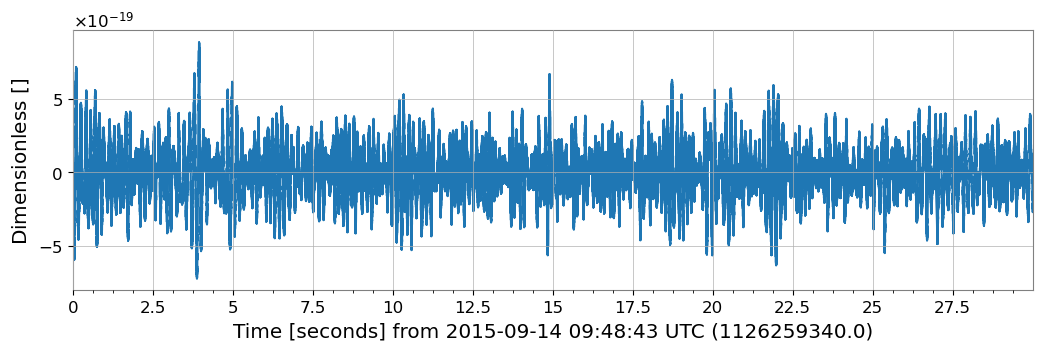

In [12]:
plot0 = ldata0f.plot()

In [13]:
np.mean(ldata0f)

<Quantity -4.63037906e-23>

In [14]:
ldata0f.times[-1] - ldata0f.times[0]

<Quantity 29.99975586 s>

In [15]:
#Cij_file_name = "Cij_gpsT1126259462_R200_D8_S4096_A1.npy"
Cij_file_name = f"Cij_gpsT1126259472_R128_D4_S4096_A0.02_N1000.npy"

In [16]:

Cij = np.load(Cij_file_name)

In [17]:
Cij.shape

(81, 81)

In [18]:
np.linalg.det(Cij)

0.0

In [19]:
Lij = np.linalg.cholesky(Cij)

In [20]:
Lij

array([[2.32247876e-19, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30455064e-19, 2.88017270e-20, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.26901195e-19, 4.27811051e-20, 2.49940124e-20, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.42716480e-19, 6.80463983e-21, 1.92106639e-20, ...,
        3.57972058e-21, 0.00000000e+00, 0.00000000e+00],
       [1.43032184e-19, 6.35754584e-21, 1.43860299e-20, ...,
        3.79895876e-21, 3.57829581e-21, 0.00000000e+00],
       [1.42043345e-19, 1.68154124e-20, 7.85839636e-21, ...,
        3.21594117e-21, 3.79892385e-21, 3.57791271e-21]])

In [21]:
inv_Lij = np.linalg.inv(Lij)

In [22]:
inv_Cij = np.linalg.inv(Cij)

In [19]:
np.save(f"inj{Cij_file_name}", inv_Cij)

In [16]:
inv_Cij = np.load(f"inj{Cij_file_name}")

In [45]:
inv_Cij@Cij

array([[ 1.00000000e+00, -2.06362579e-13, -5.33462407e-13, ...,
         2.64251568e-11,  2.59874371e-11,  2.83680876e-11],
       [ 7.69229926e-11,  1.00000000e+00,  7.47588940e-11, ...,
         4.25431493e-11,  4.27627483e-11,  3.58207181e-11],
       [-2.31152077e-10, -2.28300613e-10,  1.00000000e+00, ...,
        -2.14973524e-10, -2.13604918e-10, -2.05746101e-10],
       ...,
       [ 1.17015026e-13, -7.21089984e-13,  3.50142201e-13, ...,
         1.00000000e+00, -2.23477593e-12,  2.42200000e-14],
       [-1.22140678e-13, -2.89554951e-13, -4.33305691e-13, ...,
         2.23893255e-12,  1.00000000e+00, -1.00985292e-12],
       [ 8.22405528e-13,  3.91997224e-13,  9.85976572e-13, ...,
         5.24760552e-13,  1.85707139e-12,  1.00000000e+00]])

In [23]:
Lij@inv_Lij

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.06362905e-16,  1.00000000e+00,  1.09544348e-15, ...,
         1.91687629e-16, -1.97448622e-16,  0.00000000e+00],
       [-2.41405111e-15, -2.34007211e-15,  1.00000000e+00, ...,
         1.04894714e-17, -3.02259503e-17,  0.00000000e+00],
       ...,
       [-5.07398040e-16, -2.52985683e-15, -1.64351453e-15, ...,
         1.00000000e+00, -5.73199630e-17,  0.00000000e+00],
       [-1.85763179e-15, -2.71814348e-16, -2.78210718e-15, ...,
        -3.46532574e-17,  1.00000000e+00,  0.00000000e+00],
       [-8.10703325e-16,  2.74988718e-15, -3.18506410e-15, ...,
        -7.26649850e-16,  1.11758579e-16,  1.00000000e+00]])

# Inject a damped sinusoid in the noise

In [23]:
time_axis = np.array(ldata0f.times)

In [27]:
import qnm

qnm.download_data()

Destination path /mnt/pfs/vaishak.p/qnm/data-0.4.0.tar.bz2 already exists, use overwrite=True to force an overwrite.


In [28]:
grav_220 = qnm.modes_cache(s=-2,l=2,m=2,n=0)
omega_inj, _, _ = grav_220(a=0.68)
print(omega_inj)

(0.523975104290084-0.08151262363119886j)


In [30]:
Msun = 2*1e30
G = 6.6743 * 1e-11
c = 2.99792458 * 1e8
Mevent = 62

Tc = G*Msun*Mevent/(c**3)

In [31]:
Tc

0.0003071604534396641

In [32]:
omega_exp = omega_inj/Tc

In [33]:
f_gamma = 1/(2*np.pi/1705.8677262078243)
f_gamma

271.49728088690716

In [34]:
omega_inj_SI = omega_inj/Tc
f_SI = omega_inj_SI/(2*np.pi)
print(omega_inj_SI, f_SI)

(1705.8677262078243-265.3747340140924j) (271.49728088690716-42.235700690039735j)


In [35]:
# Full fata duration
len(time_axis)/sf

30.0

In [30]:
ans_dur = 0.02

In [31]:
def signal_generator(x):

    A0, omega0, gamma0, t0, phi0 = x

    start_ind = np.argmin(abs(time_axis - t0))

    local_time_axis = np.linspace(0, ans_dur, int(ans_dur*sf))

    func = A0*np.cos(omega0*(local_time_axis) + phi0) * np.exp(-gamma0*(local_time_axis))

    signal = np.zeros(len(time_axis))


    signal[start_ind: start_ind + int(ans_dur*sf)] = func

    return signal

def signal_generator_two_modes(x):

    x0, x1 = x

    A0, omega0, gamma0, t0, phi0 = x0
    A1, omega1, gamma1, t1, phi1 = x1


    start_ind = np.argmin(abs(time_axis - t0))

    local_time_axis = np.linspace(0, ans_dur, int(ans_dur*sf))

    func0 = A0*np.cos(omega0*(local_time_axis) + phi0) * np.exp(-gamma0*(local_time_axis))
    func1 = A1*np.cos(omega1*(local_time_axis) + phi1) * np.exp(-gamma1*(local_time_axis))

    func = func0 + func1
    
    signal = np.zeros(len(time_axis))


    signal[start_ind: start_ind + int(ans_dur*sf)] = func

    return signal


def get_damped_sinusoid(time_axis, x):

    A, omega, gamma, t, phi = x
    return A*np.cos(omega*(time_axis-t) + phi) * np.exp(-gamma*(time_axis-t))

In [34]:
time_axis[40]

1126259340.0097656

In [25]:
full_data = ldata0f

In [36]:
len(time_axis)

122880

In [37]:
250

250

In [24]:
def whiten(x):

    return np.dot(inv_Lij, x)

def inner_product(x, y):

    xbar = whiten(x)
    ybar = whiten(y)

    return np.dot(xbar, ybar)

In [55]:
1000/1.4

714.2857142857143

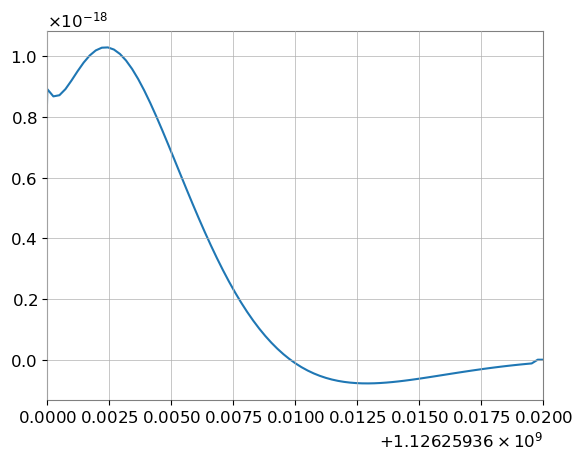

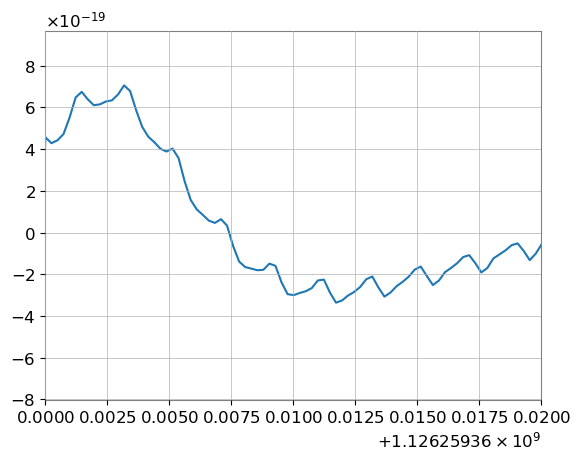

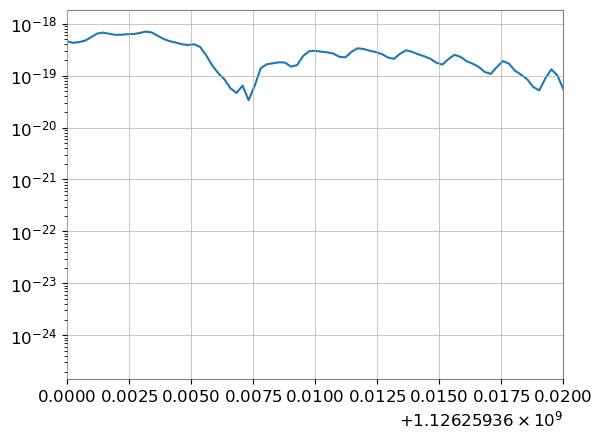

Matched filter SNR 64.52802990793771


In [93]:
A0 = 3e-18
omega0 = 250 #omega_exp.real
gamma0 = 250 #abs(omega_exp.imag)
t0 = time_axis[20*sf]
phi0=5.34


A1 = 4e-18
omega1 = 245
gamma1 = 714.285
t1 = t0
phi1 = 1.79

first_mode = [A0, omega0, gamma0, t0, phi0]
second_mode = [A1, omega1, gamma1, t1, phi1]

#time_axis_0 = time_axis[req_duration*sf:(req_duration+1)*sf]

signal = signal_generator_two_modes([first_mode, second_mode])


analysis_data = full_data  + signal - np.mean(full_data)

plt.plot(time_axis, signal)
plt.xlim(t0, t0+ans_dur)
#plt.ylim(-2e-21, 2e-21)
plt.show()


plt.plot(time_axis, analysis_data)
plt.xlim(t0, t0+(ans_dur))
#plt.ylim(-2e-21, 2e-21)
plt.show()


plt.semilogy(time_axis, abs(analysis_data))
plt.xlim(t0, t0+(ans_dur))
#plt.ylim(-2e-21, 2e-21)
plt.show()

data_seg = analysis_data[20*sf: 20*sf + int(ans_dur*sf)]
signal_seg = signal[20*sf: 20*sf + int(ans_dur*sf)]
time_seg = time_axis[20*sf: 20*sf + int(ans_dur*sf)]

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)
signal_seg_norm = inner_product(signal_seg, signal_seg)

#signal_seg_norm = np.dot(signal_seg, inv_Cij@signal_seg)

#data_sig_inner_prod = np.dot(data_seg, inv_Cij@signal_seg)
data_sig_inner_prod = inner_product(data_seg, signal_seg)

mf_snr = data_sig_inner_prod/np.sqrt(signal_seg_norm)

print('Matched filter SNR', mf_snr)


In [40]:
int(ans_dur*sf)

81

In [34]:
len(signal_seg)

81

In [35]:
Cij.shape

(81, 81)

In [36]:
mf_snr

<Quantity 14.58142386>

In [41]:
analysis_data = np.array(analysis_data)

In [42]:
sf

4096

In [43]:
x0 = np.array([A0, omega0, gamma0, t0, phi0])

In [94]:
def TimeDomainLogLiklihood(dx):

    #A, omega, gamma, t0, phi0 = x
    # A, omega, gamma, phi = x
    # omega, gamma, t = x
    # dA, domega, dgamma, dt, dphi = dx
    dA0, domega0, dgamma0, dphi0, dA1, domega1, dgamma1, dphi1 = dx
    #dA = 0
    dt = 0
    #dphi = 0
    
    #t = t0
    # print(f"A {A}, omega {omega}, gamma {gamma}, t0 {t0}, phi0 {phi0}")
    
    

    # X0 = 
    Ap0 = A0 +dA0
    omegap0 = omega0 + domega0
    gammap0 = gamma0+dgamma0
    t = t0 + dt
    phip0 = phi0 + dphi0
    
    Ap1 = A1 +dA1
    omegap1 = omega1 + domega1
    gammap1 = gamma1+dgamma1
    #t = t0 + dt
    phip1 = phi1 + dphi1


    #xf = x0 + dx

    #t = xf[-2]

    tloc = np.argmin(abs(time_axis-t))
    
    #print(tloc)

    tloc_end = tloc + int(ans_dur*sf)

    data = analysis_data[tloc:tloc_end]
    cdata = data - np.mean(data)

    #print(len(data)/sf)

    local_time_axis = time_axis[tloc:tloc_end]

    #print(len(local_time_axis)/sf)
    
    #signal =  A*np.cos(omega*(local_time_axis-t) + phi) * np.exp(-gamma*(local_time_axis-t))

    signal = get_damped_sinusoid(local_time_axis, [Ap0, omegap0, gammap0, t, phip0]) + get_damped_sinusoid(local_time_axis, [Ap1, omegap1, gammap1, t, phip1])
    
    #signal = signal_generator([A0, omega0, gamma0, t0, phi0])

    #print(len(signal))
    #tend signa= 16*sf
    #print(signal, local_time_axis[tloc])
    #plt.plot(local_time_axis, signal)
    #plt.scatter(local_time_axis, data, s=1, alpha=0.3, c='orange')
    #plt.show()
    #signal = s[tloc:tloc+16*sf]
    
    # print(tloc)
    #print(s[:tloc+10], tloc)

    delta = cdata-signal

    # delta_bar = whiten(delta)

    LnP = (-1/2) * (inner_product(delta, delta))

    return LnP

In [38]:
TimeDomainLogLiklihood([1e-22, 25, 20, 0, 1e-22, 25, 20, 2])

<Quantity -52.14020353>

In [37]:
TimeDomainLogLiklihood([0, 0, 0, 0, 0])

<Quantity -14.34847854>

In [39]:
time_axis[0]

1126259254.0

In [40]:
gps0

1126259462.4

In [41]:
A0

1e-21

In [25]:
2*np.pi*250, 

1570.7963267948965

In [39]:
A0, omega0, gamma0, phi0

(3e-19, 250, 250, 0)

In [40]:
A1, omega1, gamma1, phi1

(1e-19, 200, 300, 1)

In [95]:
import numpy as np

# Define the dimensionality of our problem.
ndim = 8

# Define our 3-D correlated multivariate normal log-likelihood.
# C = np.identity(ndim)

#lnorm = -0.5 * (np.log(2 * np.pi) * ndim +
#                np.log(np.linalg.det(Cij)))


# Define our uniform prior via the prior transform.
def ptform_omega(u):
    return 5 + u*10

def ptform_gamma(u):
    return 1 + u*2

def ptform(u):

    x = np.array(u)

    x[0] = -1e-17 + u[0]*2e-17

    x[1] = -45 + u[1]*90
    x[2] = -50 + u[2]*100
    
    #x[3] = -np.pi/1000 + u[3]*2*np.pi/1000
    x[3] = -np.pi + 0.0001 + u[3]*1.99*np.pi

    x[4] = -1e-17 + u[0]*2e-17

    x[5] = -45 + u[1]*90
    x[6] = -50 + u[2]*100
    x[7] = -np.pi + 0.0001 + u[3]*1.99*np.pi



    # x[0] = -5e-16 + u[0]*10e-16
    #x[0] = 
    #x[1] =  4 + u[0]*8
    #x[2] =  u[1]*8

    #x[1] = u[1]*25
    # x[1] = -15 + u[1]*30

    # x[2] = -15 + u[2]*30
    #x[2] = u[2]*20
    #x[2] = gps0 +12 + u[2]*6
    #x[3] = gps0 + 0.1 - 8 + u[3]*7
    
    # x[3] = -2.5 + u[3]*5

    # x[4] = -np.pi/2 + u[4]*2*np.pi/2
     
    return x

In [203]:
omega_exp

(1705.8677262078243-265.3747340140924j)

In [46]:
A0, omega0, gamma0, t0, phi0

(3e-19, 250, 250, 1126259360.0, 0)

In [82]:
from dynesty import NestedSampler

In [87]:
sampler = NestedSampler(TimeDomainLogLiklihood, ptform, ndim, nlive=10000)

In [88]:
sampler.run_nested()

29351it [02:13, 219.70it/s, +10000 | bound: 0 | nc: 1 | ncall: 196134 | eff(%): 21.141 | loglstar:   -inf < -13.870 <    inf | logz: -18.974 +/-  0.037 | dlogz:  0.001 > 10.009]


In [34]:
import dynesty

In [43]:
from dynesty import DynamicNestedSampler

In [80]:
help(DynamicNestedSampler)

Help on class DynamicNestedSampler in module dynesty.dynesty:

class DynamicNestedSampler(dynesty.dynamicsampler.DynamicSampler)
 |  DynamicNestedSampler(loglikelihood, prior_transform, ndim, nlive=None, bound='multi', sample='auto', periodic=None, reflective=None, update_interval=None, first_update=None, npdim=None, rstate=None, queue_size=None, pool=None, use_pool=None, logl_args=None, logl_kwargs=None, ptform_args=None, ptform_kwargs=None, gradient=None, grad_args=None, grad_kwargs=None, compute_jac=False, enlarge=None, bootstrap=None, walks=None, facc=0.5, slices=None, fmove=0.9, max_move=100, update_func=None, ncdim=None, blob=False, save_history=False, history_filename=None)
 |
 |  The main class for performing dynamic nested sampling.
 |  It inherits all the methods from dynesty.dynamicsampler.DynamicSampler
 |
 |  Method resolution order:
 |      DynamicNestedSampler
 |      dynesty.dynamicsampler.DynamicSampler
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init

In [96]:
dsampler = DynamicNestedSampler(TimeDomainLogLiklihood,prior_transform=ptform, ndim=ndim, nlive=6000)

In [114]:
dsampler = DynamicNestedSampler.restore("5param_dev_17May_GW150914_like_inj.h5")

In [46]:
dsampler = DynamicNestedSampler.restore("5param_dev_17May_GW150914_like_inj_sonic_0p02_v3.h5")

In [97]:
dsampler.run_nested(checkpoint_file="5param_dev_17May_GW150914_like_inj_sonic_2modes_realistic.h5", )

30886it [32:56,  1.83s/it, batch: 0 | bound: 45 | nc: 143 | ncall: 613802 | eff(%):  4.983 | loglstar:   -inf < -269.954 <    inf | logz: -280.115 +/-  0.039 | dlogz: 259.499 >  0.010]  /mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/nestedsamplers.py:715: UserWarning: Ellipsoid sampling is extremely inefficient
  warnings.warn("Ellipsoid sampling is extremely inefficient")
30889it [33:14,  4.30s/it, batch: 0 | bound: 46 | nc: 87 | ncall: 614305 | eff(%):  4.980 | loglstar:   -inf < -269.924 <    inf | logz: -280.042 +/-  0.039 | dlogz: 259.424 >  0.010] /mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/nestedsamplers.py:715: UserWarning: Ellipsoid sampling is extremely inefficient
  warnings.warn("Ellipsoid sampling is extremely inefficient")
/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/nestedsamplers.py:715: UserWarning: Ellipsoid sampling is extremely inefficient
  warn

In [47]:
dsampler.run_nested(resume=True)

/mnt/pfs/vaishak.p/soft/anaconda3_2023/envs/gwpy/lib/python3.12/site-packages/dynesty/dynamicsampler.py:2034: RuntimeWarning: You tried to resume the run that has ended successfully.
This is not supported. No sampling was performed
  warnings.warn(


In [89]:
res = sampler.results
results = res

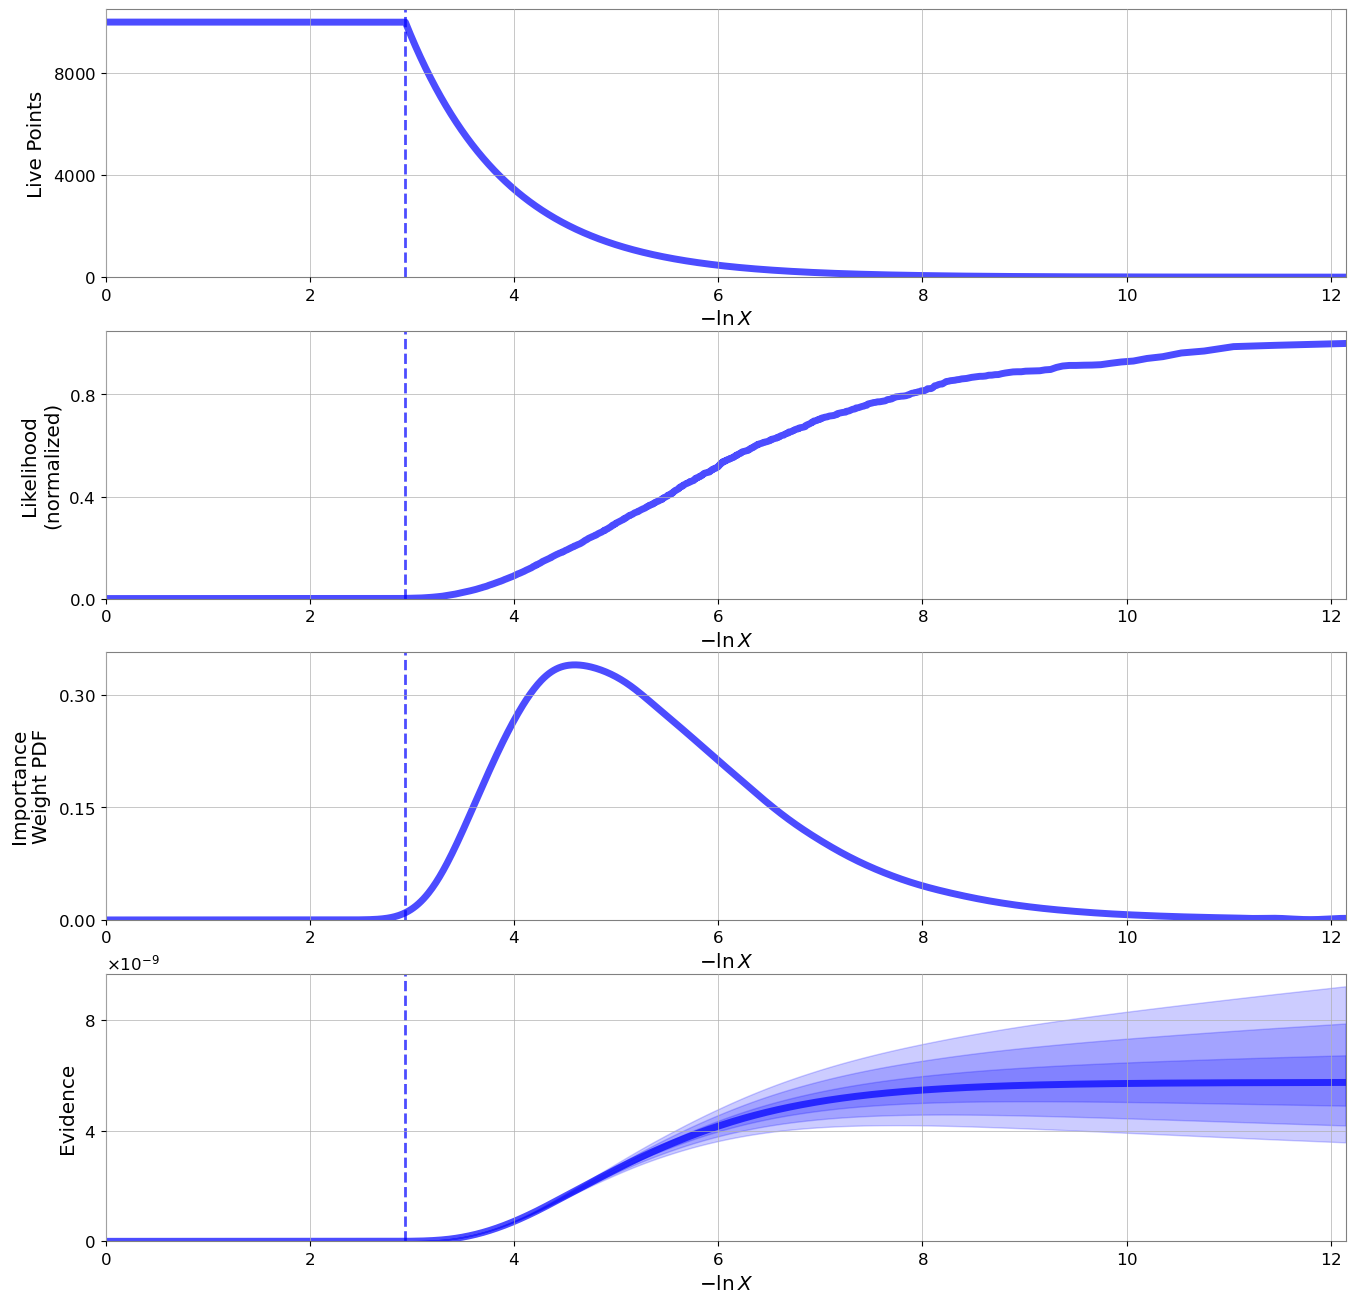

In [90]:
from dynesty import plotting as dyplot

# Plot a summary of the run.
rfig, raxes = dyplot.runplot(res)

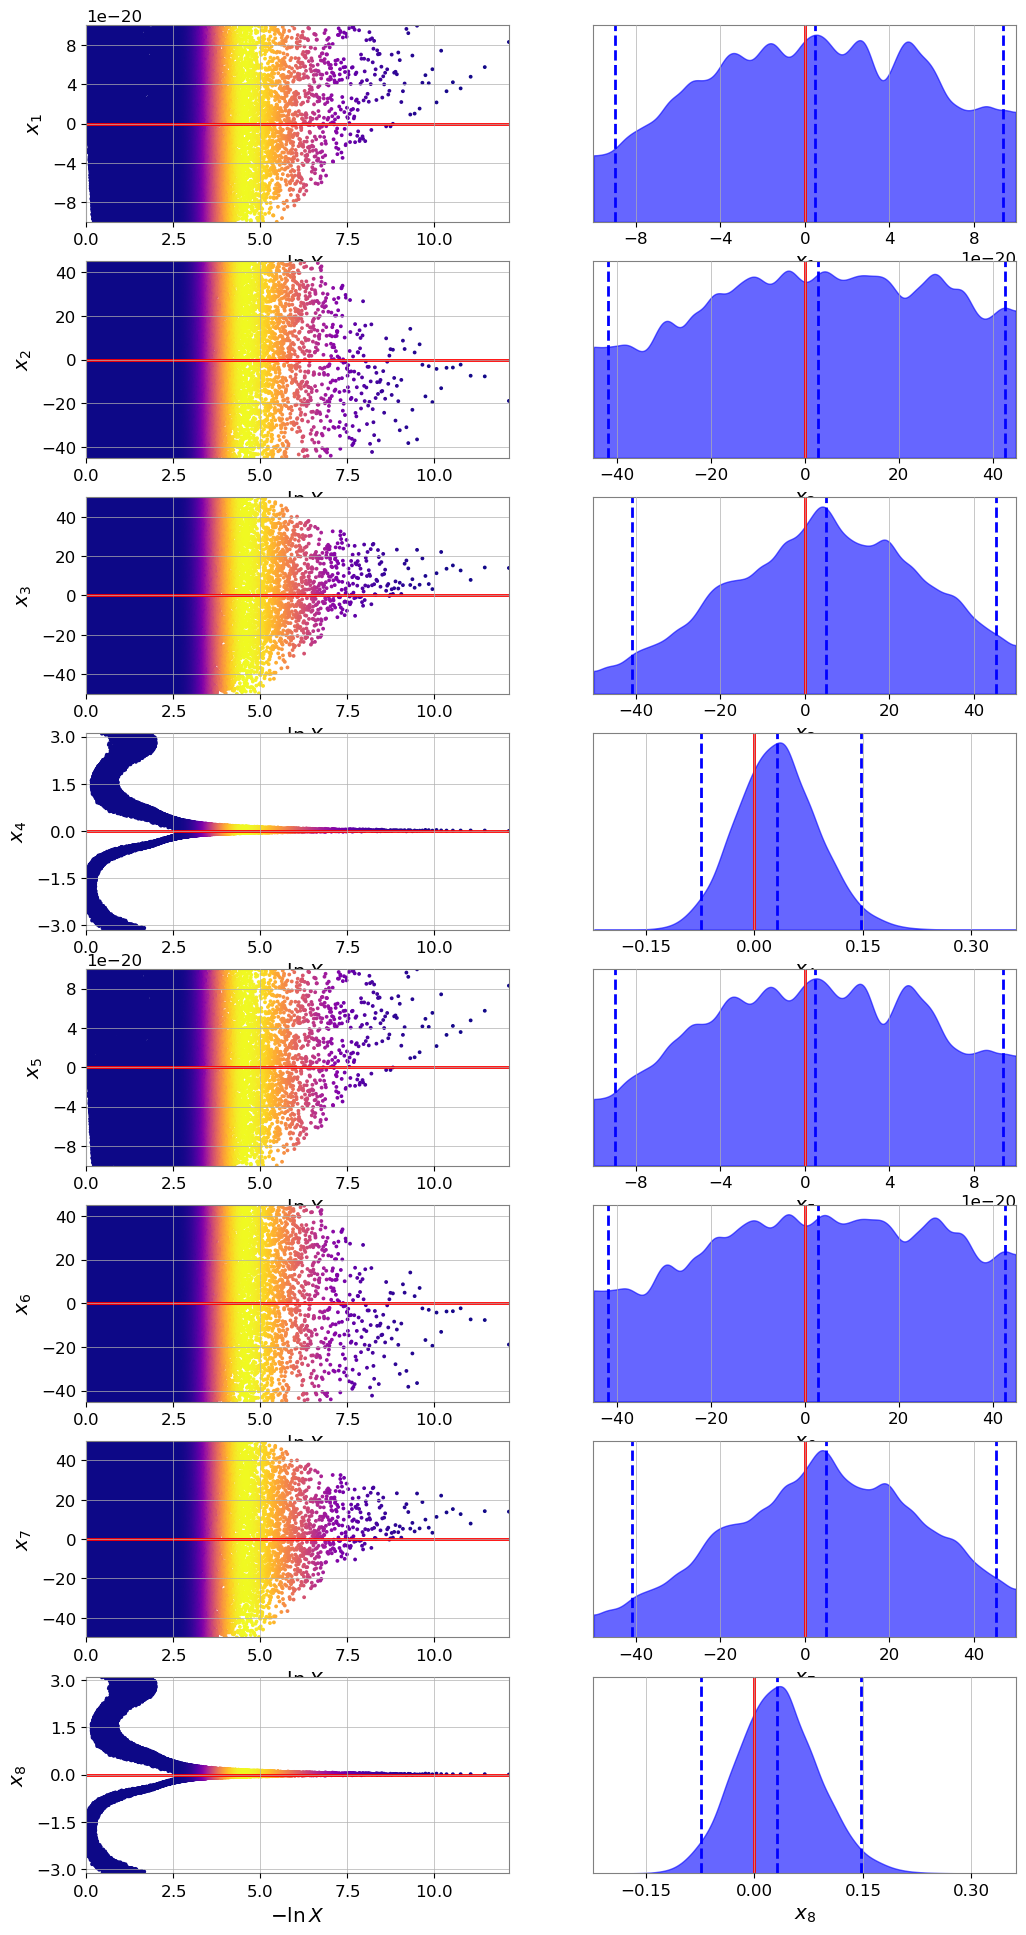

In [91]:
# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(res, truths=[0, 0, 0, 0,0,0,0,0])

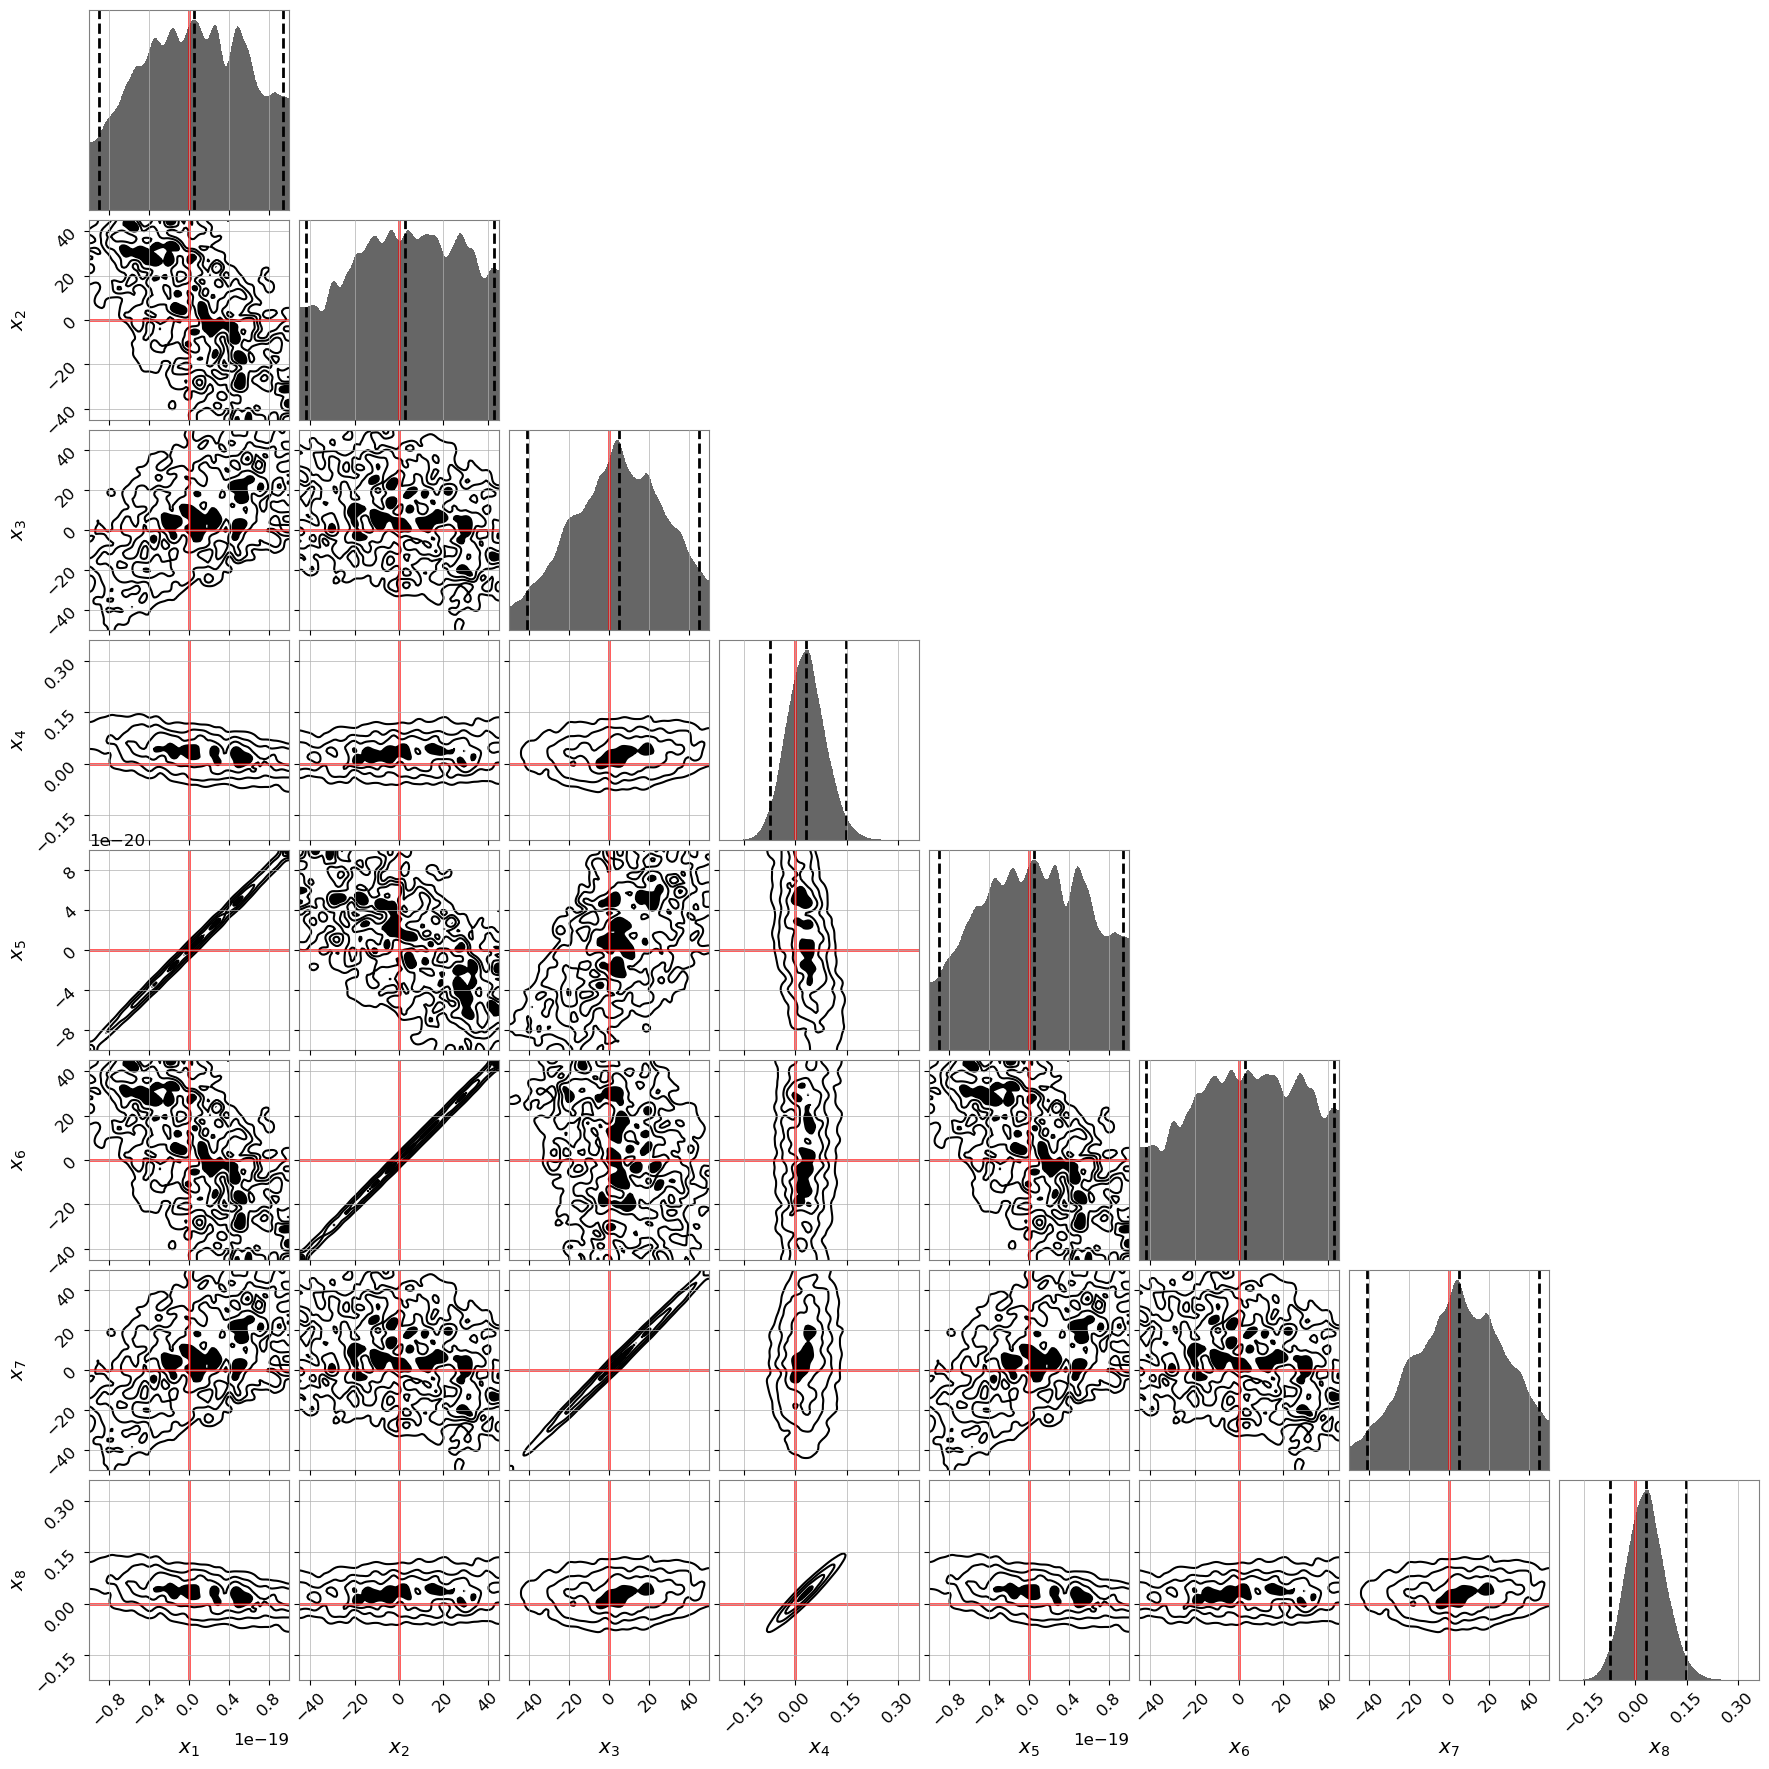

In [92]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0,0,0,0,0,0,0,0])

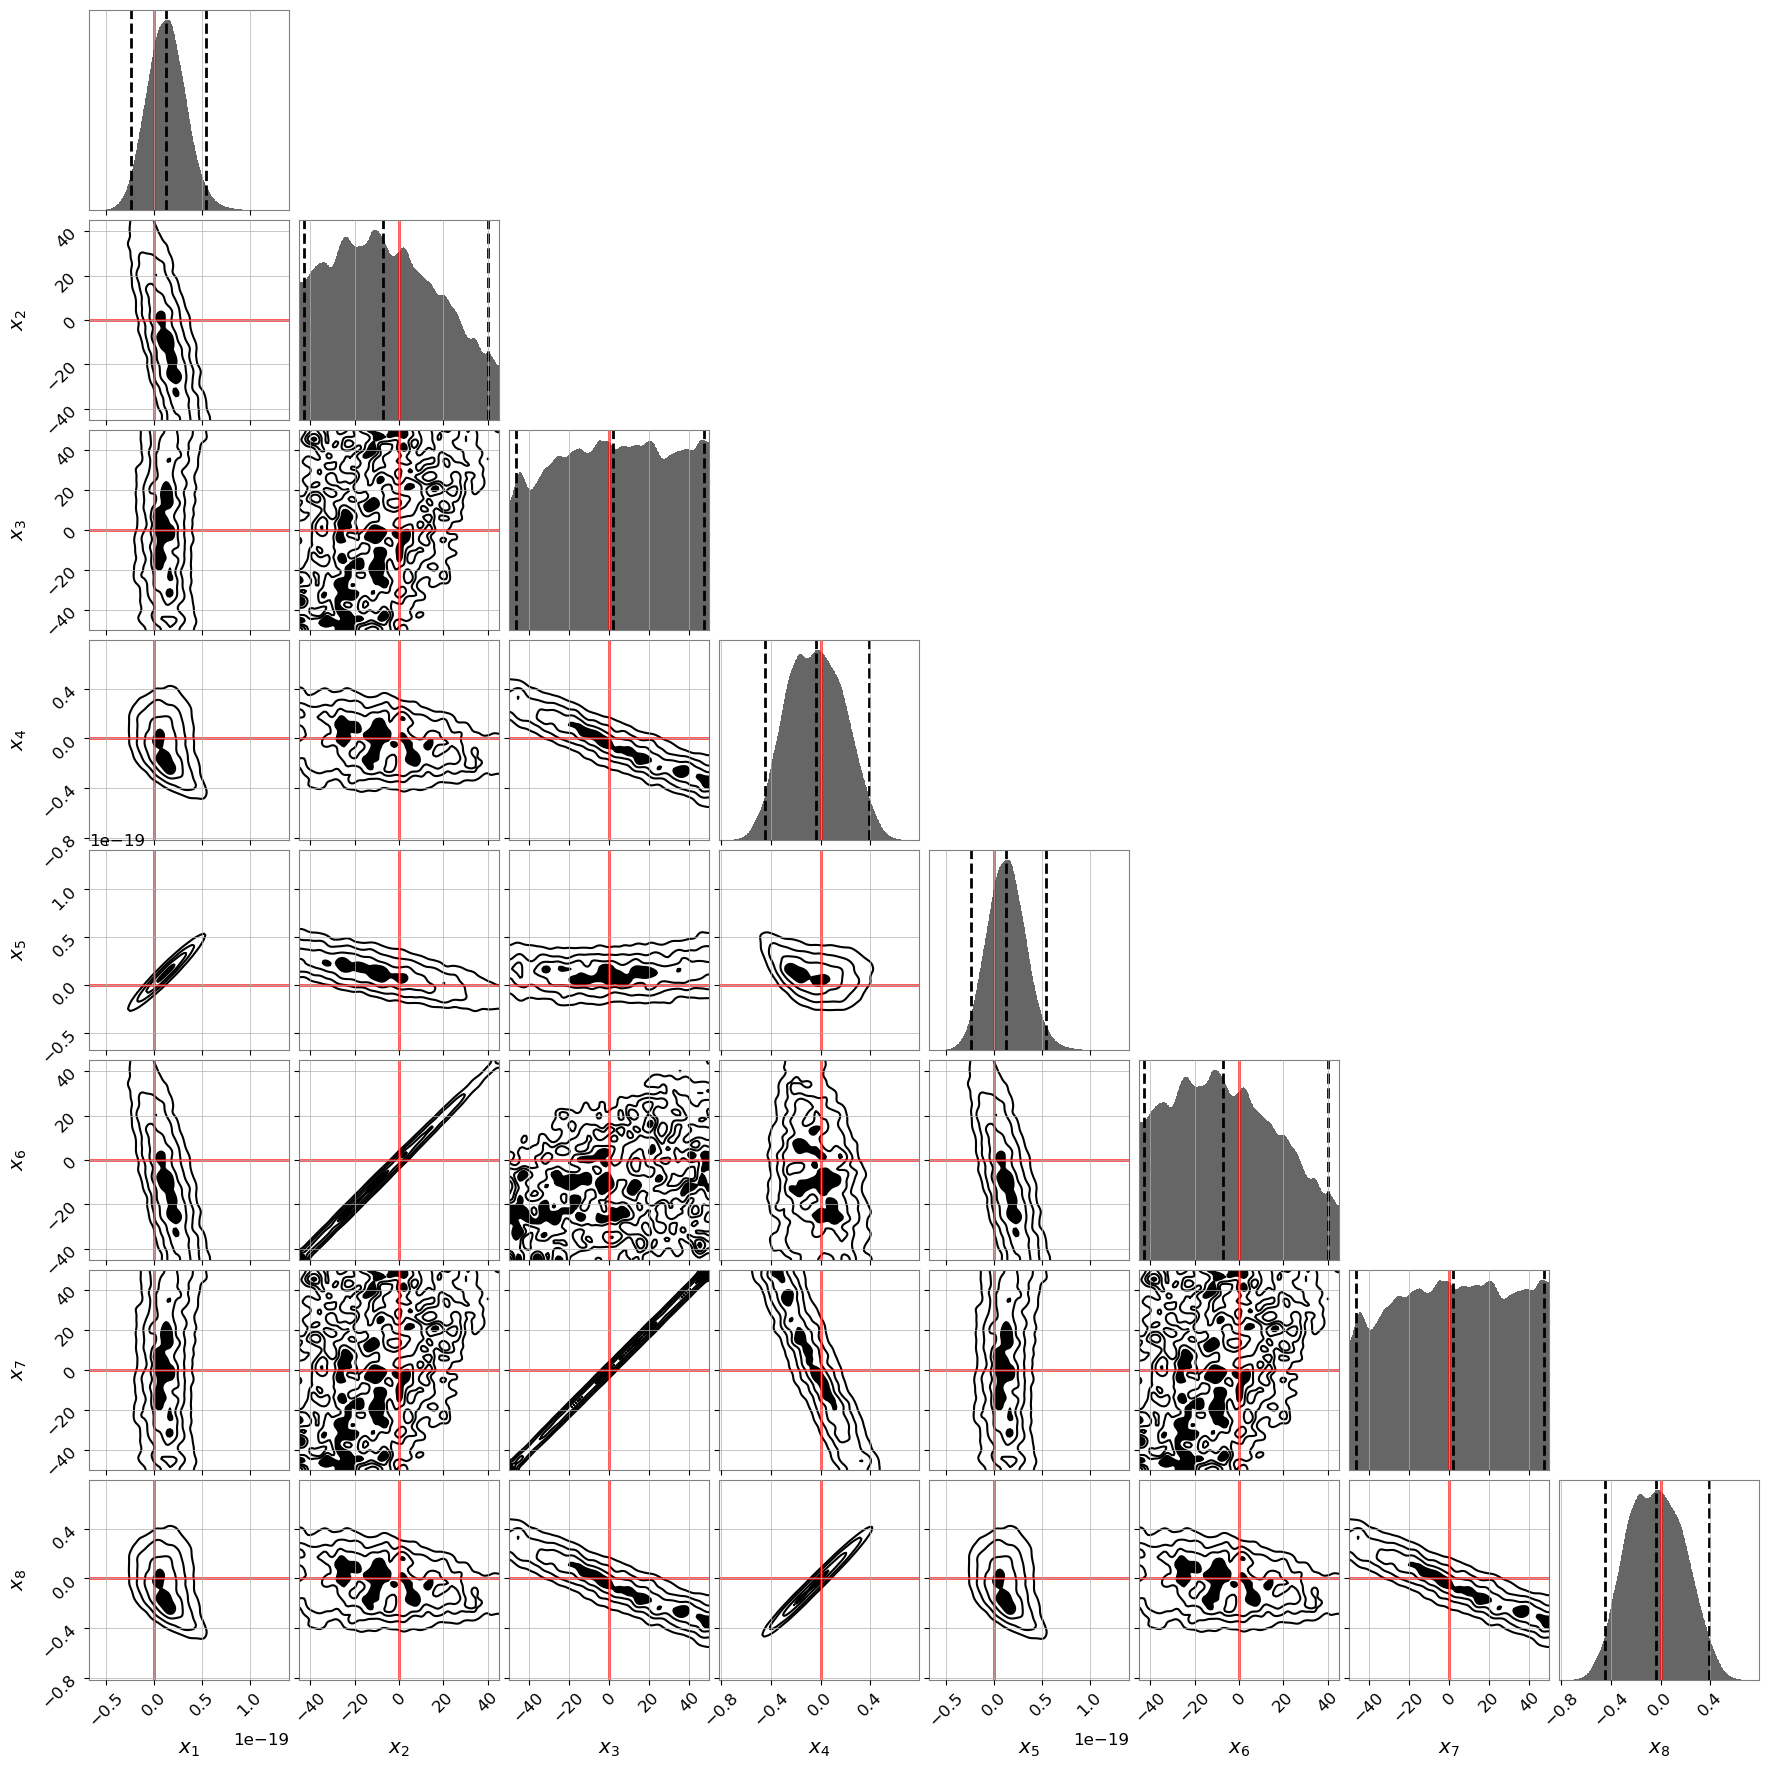

In [51]:
# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(res, truths=[0,0,0,0,0,0,0,0])

In [116]:
omega0, gamma0

(250, 250)

In [131]:
from dynesty import utils as dyfunc

# Extract sampling results.
samples = results.samples  # samples
weights = results.importance_weights()

# Compute 10%-90% quantiles.
quantiles = [dyfunc.quantile(samps, [0.1, 0.9], weights=weights)
             for samps in samples.T]

# Compute weighted mean and covariance.
mean, cov = dyfunc.mean_and_cov(samples, weights)

# Resample weighted samples.
samples_equal = results.samples_equal()

# Generate a new set of results with sampling uncertainties.
results_sim = dyfunc.resample_run(results)


sigmas = []
for pind in range(ndim):

    sigmas.append(np.sqrt(cov[pind, pind]))

print(mean, " +- ", sigmas) 

[6.10300786e-22 5.38461892e+00 3.67118052e+00]  +-  [3.593851242282611e-20, 12.170473570001231, 5.777030733463904]


In [106]:
print(mean, " +- ", sigmas) 

[ 1.83693211e-20 -1.08099441e+01 -3.60752247e+00]  +-  [3.7491895615294976e-20, 38.409115848108186, 18.818838000534274]


In [82]:
t0

1126259360.0

In [84]:
time_seg[0]

1126259360.0

In [106]:
mean

array([4.41788815, 3.75422018])

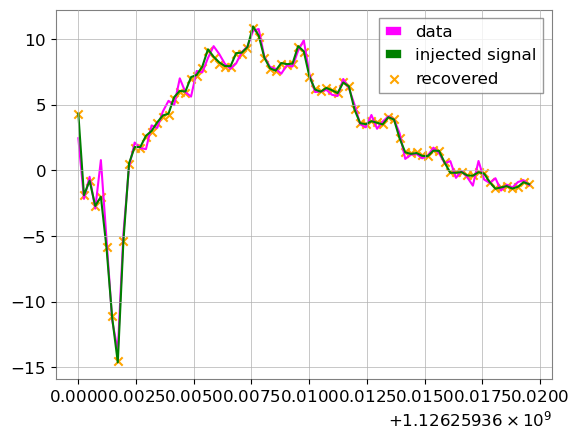

In [121]:
rec_signal_seg = get_damped_sinusoid(time_seg, [A0, omega0 + mean[0], gamma0 + mean[1], t0, phi0])

plt.plot(time_seg, inv_Lij@data_seg, label='data', c='magenta')
plt.plot(time_seg, inv_Lij@signal_seg, label='injected signal', c='green')
plt.scatter(time_seg, inv_Lij@rec_signal_seg, marker='x', c='orange', label='recovered')
plt.legend()
plt.show()

In [226]:
import scipy

In [227]:
np.mean(samples.T*weights)

-3.835724480904094e-06

In [228]:
t0

1126259294.0

In [137]:
1.54898278e+03/(2*np.pi)

246.52826620122585

In [67]:
mean

array([4.41788815, 3.75422018])

In [49]:
x0

NameError: name 'x0' is not defined

In [51]:
mean

array([-1.02596196e-19, -1.17745312e+00,  3.47519253e-02,
       -2.17097859e-01,  1.70983762e-02])

In [53]:
x0

array([1.00000000e-19, 2.70000000e+02, 5.00000000e+01,
       1.12625936e+09, 0.00000000e+00])

In [54]:
mean/x0

/tmp/ipykernel_2546272/317067153.py:1: RuntimeWarning: divide by zero encountered in divide
  mean/x0


array([-1.02596196e+00, -4.36093747e-03,  6.95038505e-04,
       -1.92760093e-10,             inf])

In [115]:
mean[2] - t0

-0.005499124526977539

In [78]:
cov

array([[ 1.05514598e-34, -5.15381450e-19, -4.18746220e-20,
         4.21599871e-19, -1.29365460e-18],
       [-5.15381450e-19,  3.34527585e+01, -8.10469897e-01,
         5.05175687e-03, -1.95935039e-01],
       [-4.18746220e-20, -8.10469897e-01,  7.19377876e+00,
         1.49118873e-03, -2.83245980e-03],
       [ 4.21599871e-19,  5.05175687e-03,  1.49118873e-03,
         2.42176516e-02, -5.76196049e-02],
       [-1.29365460e-18, -1.95935039e-01, -2.83245980e-03,
        -5.76196049e-02,  1.68934261e-01]])

In [83]:
t0 - 1.12625940e+09

76.0

In [ ]:
A

1e-18

In [ ]:
phi0

1.0471975511965976

In [ ]:
-1.58880414e+00

-1.58880414

In [ ]:
s0 =  A*np.cos(omega*(time_axis-t0) + phi0) * np.exp(-gamma*(time_axis-t0))

In [ ]:
A1, omega1, gamma1, t1, phi1 = mean

In [ ]:
s0 =  A*np.cos(omega*(time_axis-t0) + phi0) * np.exp(-gamma*(time_axis-t0))

In [ ]:
s1 = A1*np.cos(omega1*(time_axis-t1) + phi1) * np.exp(-gamma1*(time_axis-t1))

In [ ]:
s1 = A1*np.cos(omega1*(time_axis-t0) + phi1) * np.exp(-gamma1*(time_axis-t0))

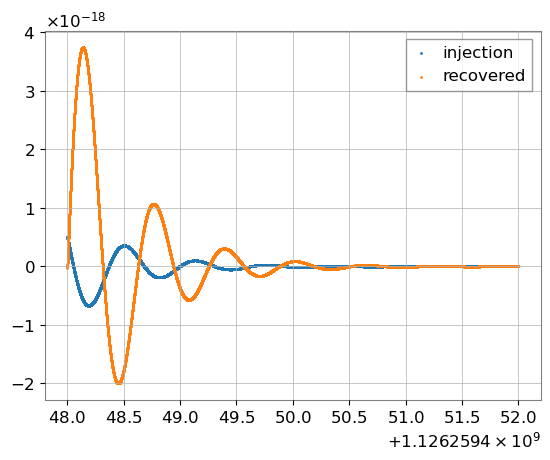

In [ ]:
plt.scatter(time_axis, s0, label='injection', s=1)
plt.scatter(time_axis, s1, label='recovered', s=1)
plt.legend()
plt.show()

In [1]:
import random
import numpy as np

random.seed(0)
N=10000

V = np.array([
    [1, 2],
    [2, 5]])

B = np.linalg.cholesky(V)
A = np.array([1, 2])

# norm() return one number from standard normal distribution
n1 = np.array([random.gauss(0, 1) for _ in range(10000)])
n2 = np.array([random.gauss(0, 1) for _ in range(10000)])
res = np.array([n1, n2]).T.dot(B.T) + A

np.cov(res.T).round()

array([[1., 2.],
       [2., 5.]])

In [3]:
res.shape

(10000, 2)